In [9]:
import numpy as np
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
import pandas as pd 
data_set = pd.read_csv('processed_traffic.csv')
data_set.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [12]:
data_set.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [13]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
data_set.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [23]:
pd.Series(data_set['DateTime']).unique()

array(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
       '2015-11-01 02:00:00', ..., '2017-06-30 21:00:00',
       '2017-06-30 22:00:00', '2017-06-30 23:00:00'],
      shape=(14592,), dtype=object)

In [25]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:
data_set.isna()

,DateTime,Junction,Vehicles,ID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
48115,False,False,False,False
48116,False,False,False,False
48117,False,False,False,False
48118,False,False,False,False


In [27]:
data_set.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [28]:
clear()

In [32]:
ds = pd.read_csv('traffic-prediction-dataset.csv')
ds.head() , ds.tail()

(   Cross 1   Cross 2   Cross 3   Cross 4   Cross 5   Cross 6
 0    105.0      48.0        30      62.0        31     110.0
 1     97.0      41.0        32      55.0        42     103.0
 2     76.0      47.0        44      58.0        40     100.0
 3     98.0      40.0        39      59.0        43     104.0
 4     87.0      41.0        47      49.0        35     112.0,
        Cross 1   Cross 2   Cross 3   Cross 4   Cross 5   Cross 6
 16123     85.0      37.0        34      56.0        35      89.0
 16124     71.0      45.0        44      50.0        44      53.0
 16125     83.0      34.0        34      61.0        44      77.0
 16126     89.0      39.0        25      48.0        32      64.0
 16127     66.0      36.0        26      50.0        37      55.0)

In [34]:
ds.isnull().sum()

Cross 1     0
 Cross 2    0
 Cross 3    0
 Cross 4    0
 Cross 5    0
 Cross 6    0
dtype: int64

In [35]:
#looking how many 0s each column have
(ds == 0).sum()

Cross 1     3615
 Cross 2    3473
 Cross 3    3952
 Cross 4    4060
 Cross 5    3947
 Cross 6    3986
dtype: int64

Replace 0s as NaN

In [42]:
ds['Cross 1'] = ds['Cross 1'].replace(0 , np.nan)
ds.isnull().sum()

Cross 1     3615
 Cross 2       0
 Cross 3       0
 Cross 4       0
 Cross 5       0
 Cross 6       0
dtype: int64

Two Options to deal with the null data 
#1 Drop is not many   -  df.dropna(subset=['income'], inplace=True)
#2 Fill with mean and meadian   -  df['income'].fillna(df['income'].median(), inplace=True)

Replace 0s with NaN 

In [50]:
col = [' Cross 2', ' Cross 3', ' Cross 4', ' Cross 5', ' Cross 6']
ds[col] = ds[col].replace(0 , np.nan)
ds.isnull().sum()

Cross 1     3615
 Cross 2    3473
 Cross 3    3952
 Cross 4    4060
 Cross 5    3947
 Cross 6    3986
dtype: int64

In [55]:
# See how many NaNs are in each row
ds.isnull().sum(axis=1).head(7379)

0       0
1       0
2       0
3       0
4       0
       ..
7374    3
7375    3
7376    5
7377    6
7378    6
Length: 7379, dtype: int64

Drop Rows where 60% of the data is missing

In [66]:
ds = ds[ds.isnull().mean(axis=1)<0.60]
ds.isnull().sum(axis=1).head(7000)

0        0
1        0
2        0
3        0
4        0
        ..
10354    0
10355    0
10356    0
10357    0
10358    0
Length: 7000, dtype: int64

In [67]:
ds.fillna(ds.median(numeric_only=True) , inplace=True)

In [72]:
ds.dropna(how = 'all' , inplace=True)

In [6]:
ds['Cross 1'].value_counts()

NameError: name 'ds' is not defined

In [8]:
data_set.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


“No categorical columns to encode.”
# Check text columns
print(ds.select_dtypes(include='object').columns)

# Encode road_type (replace with your text column)
df = pd.get_dummies(ds, columns=['road_type'], drop_first=True)

# View result
print(df.head())

(array([14592.,     0.,     0.,     0.,     0.,     0., 14592.,     0.,
            0.,     0.,     0.,     0.,     0., 14592.,     0.,     0.,
            0.,     0.,     0.,  4344.]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <BarContainer object of 20 artists>)

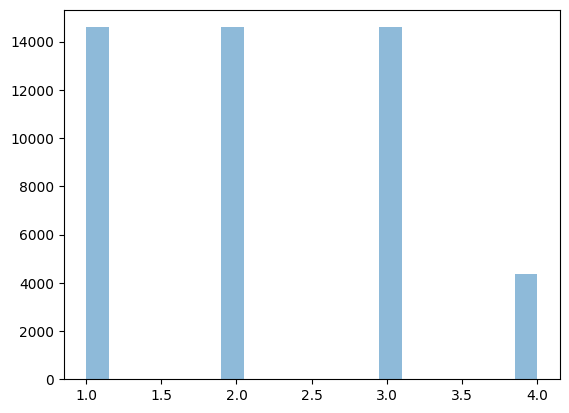

In [12]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_set[['Junction', 'Vehicles']])
plt.hist(data_set['Junction'], bins=20, alpha=0.5, label='Original Speed')